In [25]:
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [19]:
# Open the netCDF file and get the latitude and longitude variables
nc_file = netCDF4.Dataset('CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc')
lat_var = nc_file.variables['lat']
lon_var = nc_file.variables['lon']


In [20]:
# Load the latitude and longitude values into numpy arrays
lat_values = lat_var[:]
lon_values = lon_var[:]

C:\Users\emman\AppData\Local\Temp\ipykernel_48936\125737401.py:2: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  lat_values = lat_var[:]
C:\Users\emman\AppData\Local\Temp\ipykernel_48936\125737401.py:2: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  lat_values = lat_var[:]
C:\Users\emman\AppData\Local\Temp\ipykernel_48936\125737401.py:3: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  lon_values = lon_var[:]
C:\Users\emman\AppData\Local\Temp\ipykernel_48936\125737401.py:3: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  lon_values = lon_var[:]


In [26]:
#np.set_printoptions(threshold=np.inf)

In [27]:
# Load the selected latitude and longitude values from the dataframe
df = pd.read_csv('data.csv', header=None)
selected_lat = df[0][:].values
selected_lon = df[1][:].values
selected_lon

array([31.375, 31.625, 31.875, 32.125, 32.375, 30.125, 30.375, 30.625,
       30.875, 31.125, 31.375, 31.625, 31.875, 32.125, 32.375, 34.625,
       34.875, 35.125, 38.875, 39.125, 39.375, 28.625, 28.875, 29.125,
       29.375, 29.625, 29.875, 30.125, 30.375, 30.625, 30.875, 31.125,
       31.375, 31.625, 31.875, 32.125, 32.375, 34.625, 34.875, 35.125,
       38.125, 38.375, 38.625, 38.875, 39.125, 39.375, 39.625, 27.125,
       27.375, 27.625, 27.875, 28.125, 28.375, 28.625, 28.875, 29.125,
       29.375, 29.625, 29.875, 30.125, 30.375, 30.625, 30.875, 31.125,
       31.375, 31.625, 31.875, 32.125, 32.375, 32.625, 34.875, 37.875,
       38.125, 38.375, 38.625, 38.875, 39.125, 39.375, 39.625, 39.875,
       26.375, 26.625, 26.875, 27.125, 27.375, 27.625, 27.875, 28.125,
       28.375, 28.625, 28.875, 29.125, 29.375, 29.625, 29.875, 30.125,
       30.375, 30.625, 30.875, 31.125, 31.375, 31.625, 31.875, 32.125,
       32.375, 32.625, 33.125, 33.875, 37.875, 38.125, 38.375, 38.625,
      

In [23]:
selected_lon[selected_lon < 0] += 360 #Because the longitude is in -180-+180 format, this will help convert it to 0-360 of GRACE

# In summary, this line of code adds 360 to all negative values in the selected_lon array. 
# This is often done when working with longitude values in geographic data, 
# as it converts negative longitudes (i.e., those in the Western Hemisphere) to their 0-360 degree equivalent. 
# This can be useful when working with data that uses a 0-360 degree longitude range instead of the -180 to 180 degree range.

In [17]:
selected_lon

array([3.13750e+01, 3.16250e+01, 3.18750e+01, 3.21250e+01, 3.23750e+01,
       3.01250e+01, 3.03750e+01, 3.06250e+01, 3.08750e+01, 3.11250e+01,
       3.13750e+01, 3.16250e+01, 3.18750e+01, 3.21250e+01, 3.23750e+01,
       3.46250e+01, 3.48750e+01, 3.51250e+01, 3.88750e+01, 3.91250e+01,
       3.93750e+01, 2.86250e+01, 2.88750e+01, 2.91250e+01, 2.93750e+01,
       2.96250e+01, 2.98750e+01, 3.01250e+01, 3.03750e+01, 3.06250e+01,
       3.08750e+01, 3.11250e+01, 3.13750e+01, 3.16250e+01, 3.18750e+01,
       3.21250e+01, 3.23750e+01, 3.46250e+01, 3.48750e+01, 3.51250e+01,
       3.81250e+01, 3.83750e+01, 3.86250e+01, 3.88750e+01, 3.91250e+01,
       3.93750e+01, 3.96250e+01, 2.71250e+01, 2.73750e+01, 2.76250e+01,
       2.78750e+01, 2.81250e+01, 2.83750e+01, 2.86250e+01, 2.88750e+01,
       2.91250e+01, 2.93750e+01, 2.96250e+01, 2.98750e+01, 3.01250e+01,
       3.03750e+01, 3.06250e+01, 3.08750e+01, 3.11250e+01, 3.13750e+01,
       3.16250e+01, 3.18750e+01, 3.21250e+01, 3.23750e+01, 3.262

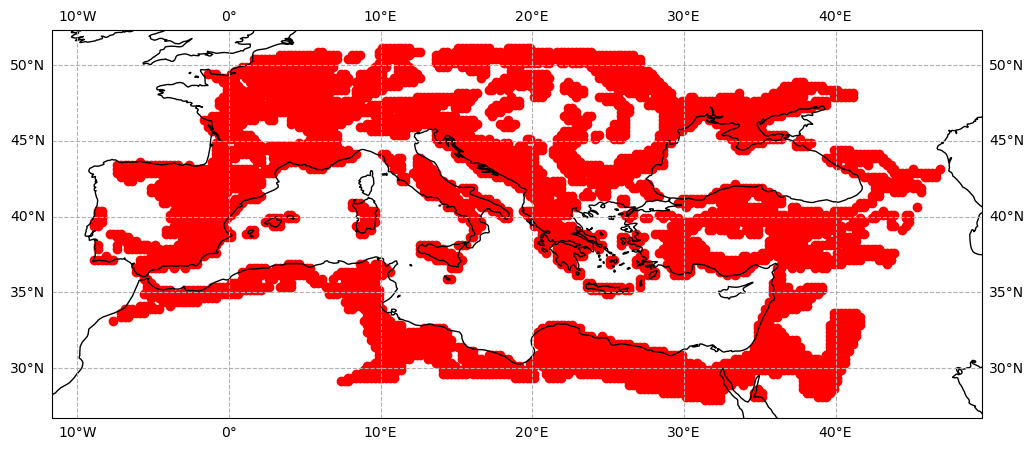

In [33]:
# Create a map plot with cartopy and matplotlib
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--')

# Plot the longitude and latitude points on the map
ax.scatter(selected_lon, selected_lat, color='red', marker='o', transform=ccrs.PlateCarree())

# Show the plot
plt.show()

In [29]:
# Find the indices of the latitude and longitude values that are closest to the selected values
lat_idx = np.abs(lat_values - selected_lat[:, np.newaxis]).argmin(axis=1)
lon_idx = np.abs(lon_values - selected_lon[:, np.newaxis]).argmin(axis=1)

In [30]:
lat_idx

array([471, 471, 471, 471, 471, 472, 472, 472, 472, 472, 472, 472, 472,
       472, 472, 472, 472, 472, 472, 472, 472, 473, 473, 473, 473, 473,
       473, 473, 473, 473, 473, 473, 473, 473, 473, 473, 473, 473, 473,
       473, 473, 473, 473, 473, 473, 473, 473, 474, 474, 474, 474, 474,
       474, 474, 474, 474, 474, 474, 474, 474, 474, 474, 474, 474, 474,
       474, 474, 474, 474, 474, 474, 474, 474, 474, 474, 474, 474, 474,
       474, 474, 475, 475, 475, 475, 475, 475, 475, 475, 475, 475, 475,
       475, 475, 475, 475, 475, 475, 475, 475, 475, 475, 475, 475, 475,
       475, 475, 475, 475, 475, 475, 475, 475, 475, 475, 475, 475, 475,
       476, 476, 476, 476, 476, 476, 476, 476, 476, 476, 476, 476, 476,
       476, 476, 476, 476, 476, 476, 476, 476, 476, 476, 476, 476, 476,
       476, 476, 476, 476, 476, 476, 476, 476, 476, 476, 476, 476, 476,
       476, 476, 476, 476, 476, 476, 476, 477, 477, 477, 477, 477, 477,
       477, 477, 477, 477, 477, 477, 477, 477, 477, 477, 477, 47

In [31]:
lon_idx

array([125, 126, 127, 128, 129, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 138, 139, 140, 155, 156, 157, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 138, 139,
       140, 152, 153, 154, 155, 156, 157, 158, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 139, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 132, 135, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        29,  30,  31, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  75,  76,  77,  78,  7

In [11]:
 #Create a new dataframe with the index values
#new_df = pd.DataFrame({'latitude_index': lat_idx, 'longitude_index': lon_idx})

In [12]:
Newdf = pd.DataFrame([])

In [13]:
point_list = zip(selected_lat,selected_lon)

In [14]:
ds = xr.open_dataset('CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc')

In [15]:
# Define the latitude and longitude index points
lat_indexes = lat_idx  # Replace with your latitude index points
lon_indexes = lon_idx  # Replace with your longitude index points

# Create an empty DataFrame to store the extracted data
columns = ['lat', 'lon'] + [f'lwe_thickness_{i}' for i in range(7, 141)]
df = pd.DataFrame(columns=columns)

# Iterate over the specified lat and lon index pairs
for lat_idx, lon_idx in zip(lat_indexes, lon_indexes):
    lat = ds['lat'][lat_idx].values
    lon = ds['lon'][lon_idx].values

    # Extract lwe_thickness for the specified indexes and lat-lon pair
    lwe_thickness_values = ds['lwe_thickness'][7:141, lat_idx, lon_idx].values

    # Store the extracted data in the DataFrame
    data = {'lat': lat, 'lon': lon, **{f'lwe_thickness_{i}': val for i, val in zip(range(7, 141), lwe_thickness_values)}}
    df = df.append(data, ignore_index=True)

# Save the DataFrame to a CSV file
df.to_csv('lwe_thickness.csv', index=False)

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_22236\1020084013.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\emman\AppData\Local

In [16]:
df

,lat,lon,lwe_thickness_7,lwe_thickness_8,lwe_thickness_9,lwe_thickness_10,lwe_thickness_11,lwe_thickness_12,lwe_thickness_13,lwe_thickness_14,...,lwe_thickness_131,lwe_thickness_132,lwe_thickness_133,lwe_thickness_134,lwe_thickness_135,lwe_thickness_136,lwe_thickness_137,lwe_thickness_138,lwe_thickness_139,lwe_thickness_140
0,27.875,31.375,2.347639,0.349183,1.131222,-0.156619,0.362504,1.260148,1.554351,1.092597,...,-1.515514,-0.757668,-2.803421,-1.701237,-3.678688,-5.038976,-3.418078,-2.909360,-4.812576,-3.848233
1,27.875,31.625,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
2,27.875,31.875,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
3,27.875,32.125,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
4,27.875,32.375,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,51.125,18.875,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168
6198,51.125,19.125,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168
6199,51.125,19.375,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168
6200,51.125,19.625,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168


In [17]:
time = nc_file.variables["time_bounds"][7:141,0:1]

In [18]:
array = time.compressed()
array.size

134

In [19]:
# define a starting date and time
start_datetime = datetime(2002, 1, 1)

In [20]:
# create an empty NumPy array to hold the resulting datetime objects
datetime_array = np.empty_like(array, dtype='datetime64[D]')

In [21]:
# iterate over the array and add each value to the starting date
for i, value in enumerate(array):
    delta_days = int(value)
    time_datetime = start_datetime + timedelta(days=delta_days)
    datetime_array[i] = np.datetime64(time_datetime, 'D')

In [22]:
datetime_array

array(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
       '2003-05-01', '2003-07-01', '2003-08-01', '2003-09-01',
       '2003-10-01', '2003-11-01', '2003-12-01', '2004-01-01',
       '2004-02-04', '2004-03-01', '2004-04-01', '2004-05-01',
       '2004-06-01', '2004-07-01', '2004-08-01', '2004-09-01',
       '2004-10-01', '2004-11-01', '2004-12-01', '2005-01-01',
       '2005-02-01', '2005-03-01', '2005-04-01', '2005-05-01',
       '2005-06-01', '2005-07-01', '2005-08-01', '2005-09-01',
       '2005-10-01', '2005-11-01', '2005-12-01', '2006-01-01',
       '2006-02-01', '2006-03-01', '2006-04-01', '2006-05-01',
       '2006-06-01', '2006-07-01', '2006-08-01', '2006-09-01',
       '2006-10-01', '2006-11-01', '2006-12-01', '2007-01-01',
       '2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01',
       '2007-06-01', '2007-07-01', '2007-08-01', '2007-09-01',
       '2007-10-01', '2007-11-01', '2007-12-01', '2008-01-01',
       '2008-02-01', '2008-03-01', '2008-04-01', '2008-

In [23]:
df.iloc[:, 2:].set_axis(datetime_array, axis='columns', inplace=True)#Replacing column name with the dates

In [24]:
df

,lat,lon,lwe_thickness_7,lwe_thickness_8,lwe_thickness_9,lwe_thickness_10,lwe_thickness_11,lwe_thickness_12,lwe_thickness_13,lwe_thickness_14,...,lwe_thickness_131,lwe_thickness_132,lwe_thickness_133,lwe_thickness_134,lwe_thickness_135,lwe_thickness_136,lwe_thickness_137,lwe_thickness_138,lwe_thickness_139,lwe_thickness_140
0,27.875,31.375,2.347639,0.349183,1.131222,-0.156619,0.362504,1.260148,1.554351,1.092597,...,-1.515514,-0.757668,-2.803421,-1.701237,-3.678688,-5.038976,-3.418078,-2.909360,-4.812576,-3.848233
1,27.875,31.625,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
2,27.875,31.875,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
3,27.875,32.125,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
4,27.875,32.375,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,51.125,18.875,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168
6198,51.125,19.125,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168
6199,51.125,19.375,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168
6200,51.125,19.625,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168


In [25]:
lwe_thickness_subset = df.iloc[:, 2:]#Subsetting from column 2-145(variables excluding lat-lon values)
lwe_thickness_subset.set_axis(datetime_array, axis ='columns', inplace=True)#Replacing column name with the dates
lat_lon_values = df.iloc[:, 0:2]

In [26]:
lwe_thickness_subset
lat_lon_values

,lat,lon
0,27.875,31.375
1,27.875,31.625
2,27.875,31.875
3,27.875,32.125
4,27.875,32.375
...,...,...
6197,51.125,18.875
6198,51.125,19.125
6199,51.125,19.375
6200,51.125,19.625


In [27]:
lwe_thickness = pd.concat([lat_lon_values.iloc[:, 0:2], lwe_thickness_subset], axis=1)

In [28]:
lwe_thickness

,lat,lon,2003-01-01 00:00:00,2003-02-01 00:00:00,2003-03-01 00:00:00,2003-04-01 00:00:00,2003-05-01 00:00:00,2003-07-01 00:00:00,2003-08-01 00:00:00,2003-09-01 00:00:00,...,2014-01-01 00:00:00,2014-03-03 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2015-01-13 00:00:00
0,27.875,31.375,2.347639,0.349183,1.131222,-0.156619,0.362504,1.260148,1.554351,1.092597,...,-1.515514,-0.757668,-2.803421,-1.701237,-3.678688,-5.038976,-3.418078,-2.909360,-4.812576,-3.848233
1,27.875,31.625,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
2,27.875,31.875,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
3,27.875,32.125,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
4,27.875,32.375,2.348135,1.321140,1.651456,0.033617,0.122667,1.358490,1.592737,0.838728,...,-1.455603,-0.855468,-3.187253,-2.666142,-4.449860,-5.599591,-3.530945,-3.770344,-5.294433,-2.976057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,51.125,18.875,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168
6198,51.125,19.125,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168
6199,51.125,19.375,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168
6200,51.125,19.625,6.275568,7.613654,8.911764,5.438148,3.388230,-3.624449,-6.282297,-8.135652,...,5.218032,5.373110,4.347394,2.250464,0.476590,-4.456079,-3.804894,-5.674184,-6.276214,-0.665168


In [29]:
lwe_thickness.to_csv('lwe_thickness_time_series.csv', index=False)